In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [3]:
cars = pd.read_csv('Cars.csv')


In [4]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [5]:
cars.info


<bound method DataFrame.info of      HP        MPG  VOL          SP         WT
0    49  53.700681   89  104.185353  28.762059
1    55  50.013401   92  105.461264  30.466833
2    55  50.013401   92  105.461264  30.193597
3    70  45.696322   92  113.461264  30.632114
4    53  50.504232   92  104.461264  29.889149
..  ...        ...  ...         ...        ...
76  322  36.900000   50  169.598513  16.132947
77  238  19.197888  115  150.576579  37.923113
78  263  34.000000   50  151.598513  15.769625
79  295  19.833733  119  167.944460  39.423099
80  236  12.101263  107  139.840817  34.948615

[81 rows x 5 columns]>

In [6]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [7]:
cars.isnull().sum() # check for missing values


HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [8]:
cars.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

In [9]:
cars.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

# EDA

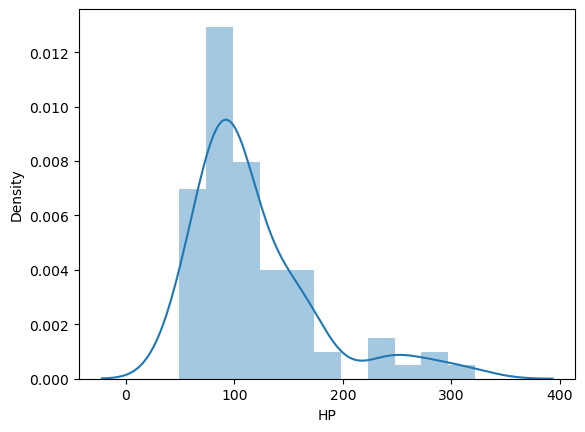

In [10]:
sns.distplot(cars['HP'])
plt.show()

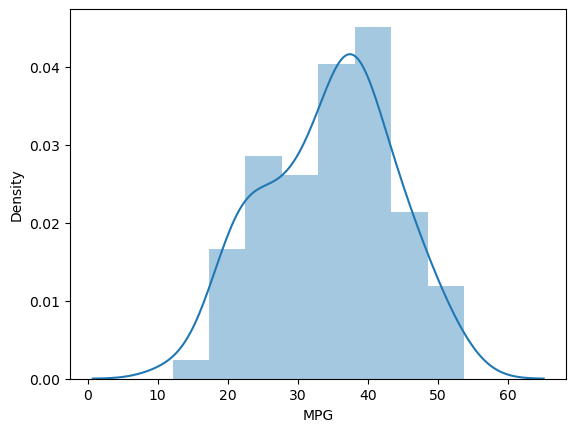

In [11]:
sns.distplot(cars['MPG'])
plt.show()

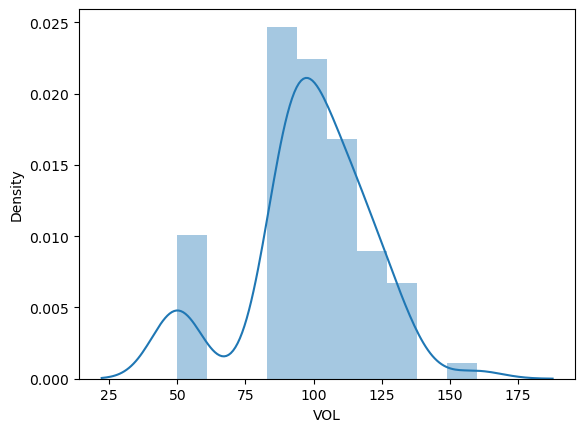

In [12]:
sns.distplot(cars['VOL'])
plt.show()

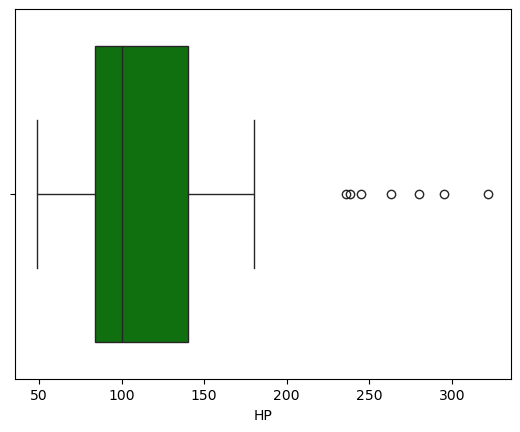

In [13]:
sns.boxplot(x=cars['HP'],color = 'green')
plt.show()

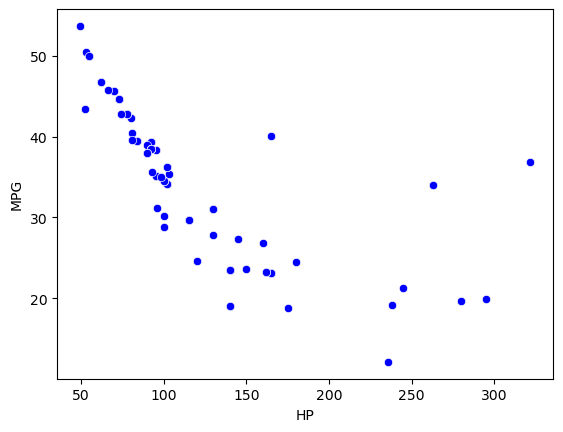

In [14]:
sns.scatterplot(x=cars['HP'],y = cars['MPG'],color='blue')
plt.show()

In [15]:
from seaborn import scatterplot

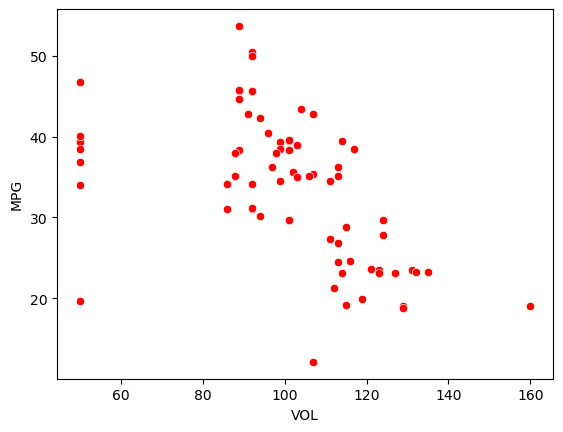

In [16]:
sns.scatterplot(x=cars['VOL'],y = cars['MPG'],color='RED')
plt.show()

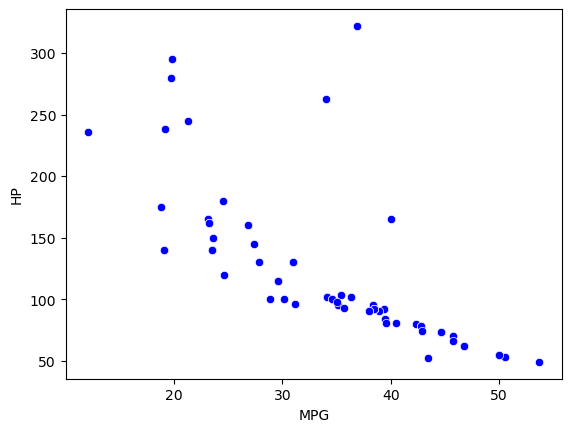

In [17]:
sns.scatterplot(x=cars['MPG'],y = cars['HP'],color='blue')
plt.show()

# correlation matrix

In [18]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


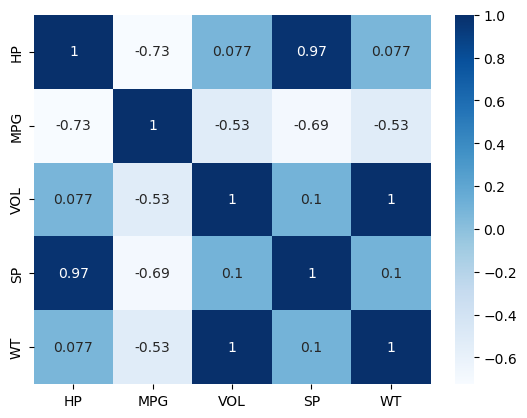

In [19]:
sns.heatmap(cars.corr(),cmap="Blues",annot=True)
plt.show()

# preparing model 


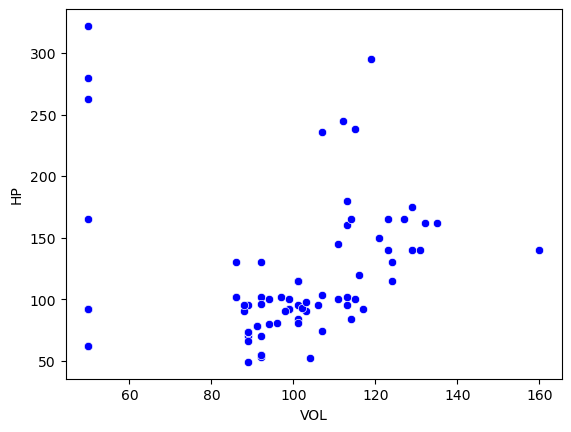

In [20]:
sns.scatterplot(x=cars['VOL'],y = cars['HP'],color='blue')
plt.show()

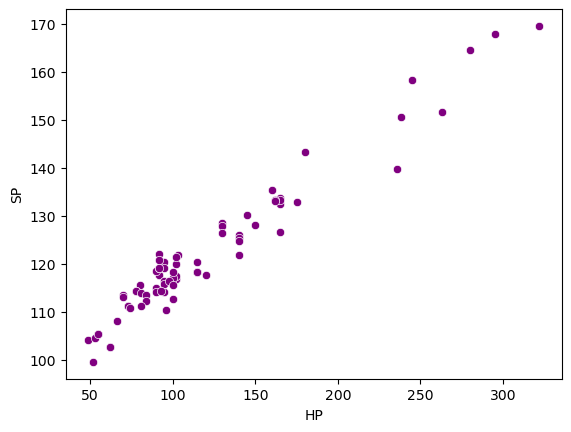

In [21]:
sns.scatterplot(x=cars['HP'],y = cars['SP'],color='purple')
plt.show()

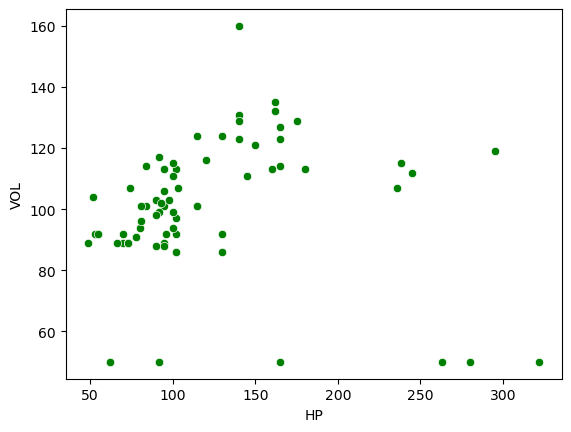

In [22]:
sns.scatterplot(x=cars['HP'],y = cars['VOL'],color='green')
plt.show()

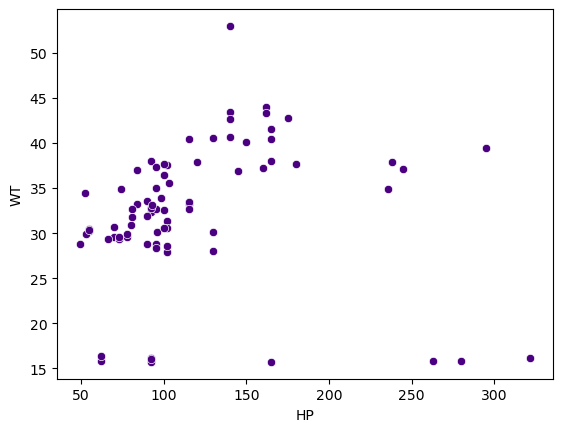

In [23]:
sns.scatterplot(x=cars['HP'],y = cars['WT'],color='indigo')
plt.show()

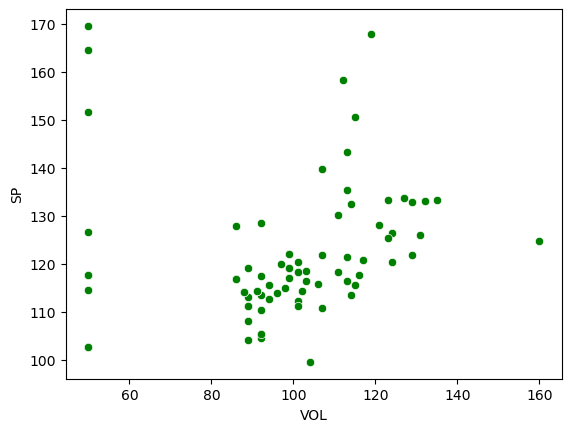

In [24]:
sns.scatterplot(x=cars['VOL'],y = cars['SP'],color='green')
plt.show()

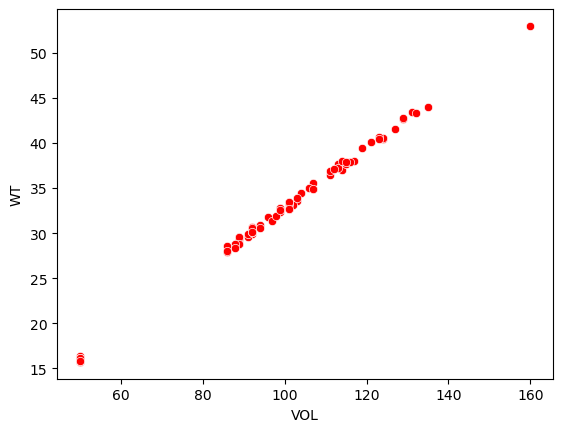

In [25]:
sns.scatterplot(x=cars['VOL'],y = cars['WT'],color='red')
plt.show()

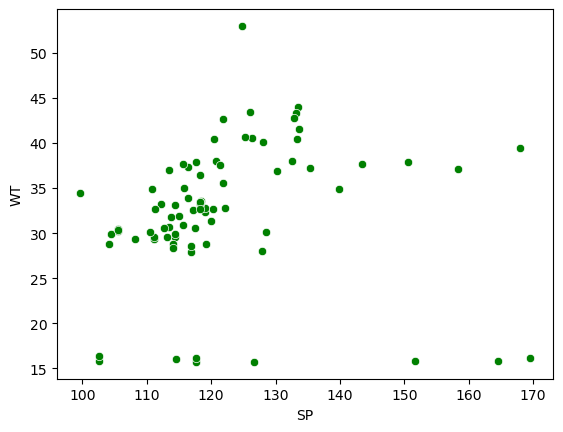

In [26]:
sns.scatterplot(x=cars['SP'],y = cars['WT'],color='green')
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cars[['HP','VOL','SP','WT']]

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


# simple linear regression

In [28]:
m_v=smf.ols('MPG~VOL',data = cars).fit()
m_v.rsquared

0.27990086511227075

In [29]:
m_w=smf.ols('MPG~WT',data = cars).fit()
m_w.rsquared

0.2774751389270125

In [30]:
m_v.params

Intercept    55.817089
VOL          -0.216625
dtype: float64

In [31]:
m_w.params

Intercept    55.229590
WT           -0.641958
dtype: float64

In [32]:
m1_s=smf.ols('MPG~SP',data = cars).fit()
m1_s.rsquared

0.4721402334141217

In [40]:
m1_v=smf.ols('MPG~HP',data = cars).fit()
m1_v.rsquared

0.5256806086282022

In [34]:
m1_v.params


Intercept    48.039202
HP           -0.115921
dtype: float64

In [35]:
m1_s.params


Intercept    88.196421
SP           -0.442441
dtype: float64

In [36]:
model = smf.ols('MPG~WT+VOL+SP+HP',data = cars).fit()

In [37]:
model

In [38]:
model.rsquared

0.7705372737359844

In [39]:
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

Y = B1*X1 + B2*X2 + B3*X3 + B4*X4 + B0